<a href="https://colab.research.google.com/github/JosueRS12/-poo-/blob/master/RetoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolutional Neural Network
*Por Josué Rodríguez*

Red convolucional entrenado con dataset de flores



---
###Dependencias


---




In [ ]:
# -*- coding: utf-8 -*-

# Librerías propias para las redes neuronales por convolución

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import imagenet_utils
from IPython.display import Image
from keras.applications.vgg19 import preprocess_input




# Libreria para arreglos multidimensionales
import numpy as np


# Librería para graficar 
import matplotlib.pyplot as plt
from scipy import interp
from itertools import cycle
import itertools

# Librerías para obtener métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc



---


###Preparación de entorno de trabajo


---



In [ ]:
# Preparación del entorno para trabajar sobre GPU
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))



device_name = tf.test.gpu_device_name()
print(device_name)
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
#with tf.device('/device:GPU:0'):


Num GPUs Available:  0



SystemError: ignored



---


###Lectura y preprocesamiento de datos


---



In [ ]:
# Montar el drive en el entorno de trabajo
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Rutas de los conjuntos de imagenes
ruta_dataset_entrenamiento = "/content/drive/My Drive/reto_final/flowers/training"
ruta_dataset_prueba = "/content/drive/My Drive/reto_final/flowers/test"
ruta_dataset_validacion = "/content/drive/My Drive/reto_final/flowers/validation"
num_classes = 5

In [ ]:
# Preprocesamiento
#Data aumentation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#Load Data
train_generator = train_datagen.flow_from_directory(ruta_dataset_entrenamiento,target_size=(160, 160),color_mode='rgb',batch_size=30,class_mode='categorical',shuffle=True)
test_generator = test_datagen.flow_from_directory(ruta_dataset_prueba,target_size=(160, 160),color_mode='rgb',batch_size=1,class_mode='categorical',shuffle=False)
validation_generator = validation_datagen.flow_from_directory(ruta_dataset_validacion,target_size=(160, 160),color_mode='rgb',batch_size=30,class_mode='categorical',shuffle=True)


Found 3450 images belonging to 5 classes.
Found 434 images belonging to 5 classes.
Found 433 images belonging to 5 classes.




---


### Construcción y compilación del Modelo


---


    

In [ ]:
#Design
# Se define como un modelo secuencial
model = Sequential()

# Se añaden las capas y sus hiperparámetros
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(160, 160, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #80x80
model.add(Dropout(0.20))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model.add(Dropout(0.20))

model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model.add(Dropout(0.20))

model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.20))

model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model.add(Dropout(0.20))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# La capa de salida debe tener el mismo número de clases
model.add(Dense(5, activation='softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 160, 160, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 80, 80, 32)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 80, 80, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 80, 80, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 40, 40, 32)       0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 40, 40, 32)       

In [ ]:
#Compilation
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])



---

###Entrenamiento del Modelo


---



In [ ]:
#Training
# Funciones callbacks
callbacks = [EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5), ModelCheckpoint(filepath="/content/drive/My Drive/reto_final/model_jupyter.h5", monitor='val_loss', save_best_only=True, verbose=1,mode='min')]


step_size_train=train_generator.n/train_generator.batch_size
step_size_validation=validation_generator.n/validation_generator.batch_size

history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_data = validation_generator,
                   validation_steps = step_size_validation,
                   epochs=32, callbacks=callbacks)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  del sys.path[0]


Epoch 1/32
115/115 [==============================] - ETA: 0s - loss: 1.3764 - accuracy: 0.3922
Epoch 1: val_loss improved from inf to 1.23748, saving model to /content/drive/My Drive/reto_final/model_jupyter.h5
115/115 [==============================] - 20s 169ms/step - loss: 1.3764 - accuracy: 0.3922 - val_loss: 1.2375 - val_accuracy: 0.4596
Epoch 2/32
115/115 [==============================] - ETA: 0s - loss: 1.1457 - accuracy: 0.5180
Epoch 2: val_loss improved from 1.23748 to 1.17142, saving model to /content/drive/My Drive/reto_final/model_jupyter.h5
115/115 [==============================] - 19s 164ms/step - loss: 1.1457 - accuracy: 0.5180 - val_loss: 1.1714 - val_accuracy: 0.5150
Epoch 3/32
115/115 [==============================] - ETA: 0s - loss: 1.0612 - accuracy: 0.5670
Epoch 3: val_loss improved from 1.17142 to 1.10297, saving model to /content/drive/My Drive/reto_final/model_jupyter.h5
115/115 [==============================] - 19s 166ms/step - loss: 1.0612 - accuracy: 0.5

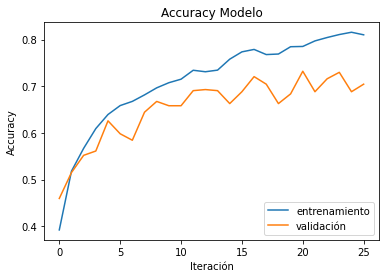

In [ ]:
# Gráfica de la métrica de precisión
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Modelo')
plt.ylabel('Accuracy')
plt.xlabel('Iteración')
plt.legend(['entrenamiento', 'validación'], loc='lower right')
plt.show()


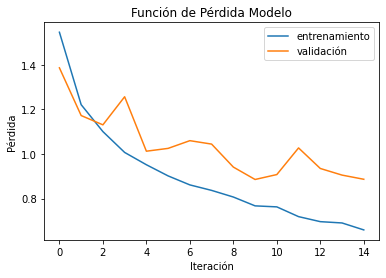

In [ ]:
# Gráfica de la función de pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Función de Pérdida Modelo')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')
plt.legend(['entrenamiento', 'validación'], loc='upper right')
plt.show()



---
###Evaluación del Modelo


---




In [ ]:
# Load Model
model_loaded = load_model("/content/drive/My Drive/reto_final/model_jupyter.h5")

In [ ]:
step_size_test=test_generator.n/test_generator.batch_size
result_evaluate =  model_loaded.evaluate_generator(test_generator,step_size_test,verbose=1)
print(result_evaluate)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


 47/434 [==>...........................] - ETA: 4:09 - loss: 2.6062 - accuracy: 0.1809

KeyboardInterrupt: ignored

In [ ]:
y_pred_prob =  model_loaded.predict_generator(test_generator, steps= step_size_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)
test_labels_one_hot = to_categorical(test_generator.classes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
print(" Por Probabilidad")
print(y_pred_prob)
print(" Por Predicción")
print(y_pred_classes)
print(" Por one hot")
print(test_labels_one_hot)

[[0.20532224 0.42712662 0.10921645 0.15944128 0.09889346]
 [0.04202533 0.050382   0.00476349 0.8887288  0.01410038]
 [0.22158457 0.38368592 0.15019915 0.12320007 0.12133031]
 ...
 [0.12206513 0.02889991 0.4210917  0.05085135 0.37709194]
 [0.14136192 0.5661313  0.05205143 0.17816423 0.06229112]
 [0.13149488 0.05198134 0.39629737 0.07952552 0.34070092]]
[1 3 1 2 4 1 4 1 1 4 1 3 1 2 2 1 4 1 0 0 1 1 1 2 1 1 1 2 1 2 4 1 3 1 4 1 1
 1 1 2 1 2 2 1 2 0 0 1 2 2 2 1 3 0 4 1 1 4 1 0 1 1 1 1 0 1 1 1 2 1 2 1 1 2
 1 1 3 3 1 1 2 3 2 0 3 3 1 0 3 1 2 1 1 3 2 1 1 1 1 2 1 4 1 0 4 2 2 4 0 1 1
 1 3 1 1 2 4 4 4 1 1 1 1 1 0 1 1 1 2 1 3 2 1 2 3 1 0 4 2 1 0 4 1 1 2 1 1 1
 2 1 3 2 2 1 3 3 2 0 1 1 1 1 3 1 2 2 3 3 1 1 4 0 0 2 1 2 3 2 0 1 1 1 1 1 1
 0 3 1 1 1 1 0 1 1 1 1 4 3 1 3 2 4 4 1 2 1 2 0 1 1 1 1 4 1 3 0 2 1 1 4 3 3
 4 2 4 1 2 2 1 4 1 1 1 2 1 2 4 1 2 2 1 1 1 2 4 1 1 2 4 1 0 1 1 3 4 1 1 4 1
 3 0 4 2 1 4 3 1 1 2 4 1 0 1 0 1 1 1 0 2 3 1 2 1 2 2 2 1 1 1 1 1 4 1 1 4 1
 1 1 1 0 2 1 2 1 4 3 3 4 1 1 2 1 0 4 1 1 1 4 2

In [ ]:

y_pred_prob =  model_loaded.predict_generator(test_generator, steps= step_size_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)
test_labels_one_hot = to_categorical(test_generator.classes)


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels_one_hot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
print(fpr)
fpr["micro"], tpr["micro"], _ = roc_curve(test_labels_one_hot.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot((fpr["micro"]), (tpr["micro"]),
         label='micro-promedio curva de ROC (área = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)


plt.plot(fpr["macro"], tpr["macro"],
         label='macro-promedio curva de ROC (área = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Curvas de ROC de la clase {0} (área = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas de ROC')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


ValueError: ignored

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_generator.classes, y_pred_classes)
print('Accuracy: %f' % accuracy)


NameError: ignored

In [ ]:
print(test_generator.classes)
print("==================================")
print(y_pred_classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
[1 1 0 2 2 0 4 4 1 1 1 1 1 2 1 2 1 2 4 1 1 0 1 4 4 1 4 4 4 1 1 4 1 1 1 1 4
 1 4 1 1 1 3 3 1 2 1 3 3 1 2 2 1 1 2 2 2 2 1

In [ ]:
# precision tp / (tp + fp)
precision = precision_score(test_generator.classes, y_pred_classes, average = 'macro')
print('Precision:', precision)


Precision: 0.19291917352026644


In [ ]:
# recall: tp / (tp + fn)
recall = recall_score(test_generator.classes, y_pred_classes, average = 'macro')
print('Recall: %f' % recall)

Recall: 0.201687


In [ ]:
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_generator.classes, y_pred_classes, average = 'macro')
print('F1 score: %f' % f1)

F1 score: 0.195747


In [ ]:
# kappa
kappa = cohen_kappa_score(test_generator.classes, y_pred_classes)
print('Cohens kappa: %f' % kappa)

Cohens kappa: 0.021775


In [ ]:
# confusion matrix
matrix = confusion_matrix(test_generator.classes, y_pred_classes)
print(matrix)

NameError: ignored

In [ ]:
#Taller opcional Parte 2

cmap = plt.get_cmap('Blues')
plt.figure(figsize=(8, 6))
plt.imshow(matrix, interpolation='nearest',cmap=cmap)
plt.title("Matriz de Confusión")
plt.colorbar()
target_names = ['rose', 'sunflower', 'tulip', 'dandelion', 'daisy']

if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)



thresh = matrix.max() / 1.5
matrix.max() / 2
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, "{:,}".format(matrix[i, j]),horizontalalignment="center",color="white" if matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta predicha ')
plt.show()

NameError: ignored

<Figure size 576x432 with 0 Axes>

## Comparaciones

### MobileNet

In [ ]:
## probando con una imagen
img_path = '/content/drive/My Drive/reto_final/flowers/test/daisy/34682895116_88ef018e83_n.jpg'
mobile = tf.keras.applications.MobileNet()
mobile.summary()


Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

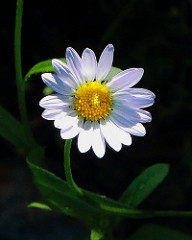

In [ ]:
def prepare_image(file):
    img_path = '/content/drive/My Drive/reto_final/flowers/test/daisy/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

Image(filename=img_path, width=300,height=200) 

In [ ]:
preprocessed_image = prepare_image('34682895116_88ef018e83_n.jpg')
predictions = mobile.predict(preprocessed_image)

In [ ]:
results = imagenet_utils.decode_predictions(predictions)
results

[[('n11939491', 'daisy', 0.9977285),
  ('n02206856', 'bee', 0.00041564368),
  ('n02169497', 'leaf_beetle', 0.00021845724),
  ('n01833805', 'hummingbird', 0.00018045711),
  ('n07745940', 'strawberry', 0.00011363185)]]

### ResNet-50

In [ ]:
resnet = tf.keras.applications.ResNet50()
resnet.summary()
img = image.load_img (img_path, target_size = (224, 224)) # cargar imagen, tamaño normalizado
x = image.img_to_array (img) # serialización
x = np.expand_dims (x, axis = 0) # Expandir
x = preprocess_input(x) # preprocess to 0 ～ 1
predictions = resnet.predict(x)

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_30 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_30[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
results = imagenet_utils.decode_predictions(predictions)
results

[[('n11939491', 'daisy', 0.9999789),
  ('n02280649', 'cabbage_butterfly', 6.6466587e-06),
  ('n02219486', 'ant', 2.3034158e-06),
  ('n02206856', 'bee', 1.9177915e-06),
  ('n02281787', 'lycaenid', 1.4702129e-06)]]

### VGG19

In [ ]:
vgg19 = tf.keras.applications.VGG19()
vgg19.summary()

img = image.load_img (img_path, target_size = (224, 224)) # cargar imagen, tamaño normalizado
x = image.img_to_array (img) # serialización
x = np.expand_dims (x, axis = 0) # Expandir
x = preprocess_input(x) # preprocess to 0 ～ 1
predictions = vgg19.predict(x)

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
results = imagenet_utils.decode_predictions(predictions)
results

[[('n11939491', 'daisy', 0.9862221),
  ('n02206856', 'bee', 0.0037463552),
  ('n02219486', 'ant', 0.0016273945),
  ('n02280649', 'cabbage_butterfly', 0.0006788999),
  ('n03991062', 'pot', 0.0006597016)]]